In [3]:
import pandas as pd
import numpy as np

# Part 1. Logistic Regression

Let's return to the `Smarket` data.

In [6]:
df = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
df.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [10]:
df1 = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
df1.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In this lab, we will fit a logistic regression model in order to predict ${\tt Direction}$ using ${\tt Lag1}$ through ${\tt Lag5}$ and ${\tt Volume}$. We'll build our model using the ${\tt LogisticRegression()}$ function.

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logiReg = LogisticRegression()

In order to better assess the accuracy
of the logistic regression model in this setting, we can fit the model
using part of the data, and then examine how well it predicts the held out
data. This will yield a more realistic error rate, in the sense that in practice
we will be interested in our model’s performance not on the data that
we used to fit the model, but rather on days in the future for which the
market’s movements are unknown.

Like we did with KNN, we will first create a vector corresponding
to the observations from 2001 through 2004. We will then use this vector
to create a held out data set of observations from 2005.

In [17]:
X_train = df[:'2004'][:]
X_train = X_train.drop('Today', axis=1)
X_train = X_train.drop('Direction', axis=1)
X_train.tail()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
Year,,,,,,
2004-01-01,0.046,0.342,0.904,0.038,-0.749,0.9561
2004-01-01,-0.431,0.046,0.342,0.904,0.038,0.9220
2004-01-01,0.715,-0.431,0.046,0.342,0.904,0.9830
2004-01-01,-0.007,0.715,-0.431,0.046,0.342,0.9259
2004-01-01,0.008,-0.007,0.715,-0.431,0.046,0.8298


In [19]:
y_train = df[:'2004']['Direction']

In [21]:
X_test = df['2005':][:]
X_test = X_test.drop(['Today', 'Direction'], axis=1)
X_test.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
Year,,,,,,
2005-01-01,-0.134,0.008,-0.007,0.715,-0.431,0.7869
2005-01-01,-0.812,-0.134,0.008,-0.007,0.715,1.5108
2005-01-01,-1.167,-0.812,-0.134,0.008,-0.007,1.7210
2005-01-01,-0.363,-1.167,-0.812,-0.134,0.008,1.7389
2005-01-01,0.351,-0.363,-1.167,-0.812,-0.134,1.5691


In [22]:
y_test = df['2005':]['Direction']

We now fit a logistic regression model using only the subset of the observations
that correspond to dates before 2005, using the subset argument.
We then obtain predicted probabilities of the stock market going up for
each of the days in our test set—that is, for the days in 2005.

In [23]:
logiReg.fit(X_train, y_train)

LogisticRegression()

In [24]:
prediction = logiReg.predict(X_test)

The ${\tt predict\_proba()}$ method can be used to predict the probability that the
market will go down, given values of the predictors.

In [26]:
print(prediction)

['Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up'
 'Up' 'Up' 'Down' 'Down' 'Down' 'Up' 'Down' 'Down' 'Down' 'Up' 'Down'
 'Down' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down'
 'Down' 'Down' 'Up' 'Down' 'Up' 'Down' 'Down' 'Up' 'Up' 'Up' 'Up' 'Up'
 'Up' 'Up' 'Up' 'Down' 'Up' 'Up' 'Down' 'Down' 'Down' 'Down' 'Down' 'Down'
 'Down' 'Down' 'Down' 'Down' 'Down' 'Up' 'Up' 'Down' 'Down' 'Up' 'Up'
 'Down' 'Down' 'Down' 'Down' 'Down' 'Down' 'Down' 'Down' 'Down' 'Down'
 'Down' 'Down' 'Down' 'Down' 'Up' 'Down' 'Down' 'Up' 'Down' 'Up' 'Down'
 'Down' 'Down' 'Down' 'Down' 'Down' 'Down' 'Up' 'Down' 'Down' 'Up' 'Down'
 'Down' 'Up' 'Up' 'Down' 'Up' 'Down' 'Down' 'Up' 'Down' 'Down' 'Down'
 'Down' 'Down' 'Up' 'Down' 'Up' 'Up' 'Up' 'Down' 'Down' 'Up' 'Up' 'Down'
 'Down' 'Up' 'Down' 'Down' 'Down' 'Down' 'Down' 'Down' 'Up' 'Down' 'Down'
 'Down' 'Down' 'Down' 'Down' 'Down' 'Down' 'Up' 'Up' 'Down' 'Down' 'Up'
 'Up' 'Up' 'Down' 'Down' 'Down' 'Down' 'Up' 'Up' 'Up' 'Down' 

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        Down       0.44      0.67      0.53       111
          Up       0.56      0.34      0.42       141

    accuracy                           0.48       252
   macro avg       0.50      0.50      0.48       252
weighted avg       0.51      0.48      0.47       252



Wait... How to tell the classes? The attribute $\tt classes\_ $ gives you the order of the classes

In [30]:
pred_prob = logiReg.predict_proba(X_test)

In [31]:
print(pred_prob)

[[0.47268396 0.52731604]
 [0.48411647 0.51588353]
 [0.4768594  0.5231406 ]
 [0.4856483  0.5143517 ]
 [0.50140495 0.49859505]
 [0.49876743 0.50123257]
 [0.49705765 0.50294235]
 [0.49023423 0.50976577]
 [0.49569785 0.50430215]
 [0.48913519 0.51086481]
 [0.489968   0.510032  ]
 [0.51844031 0.48155969]
 [0.49446796 0.50553204]
 [0.4759033  0.5240967 ]
 [0.48276749 0.51723251]
 [0.48732982 0.51267018]
 [0.50145706 0.49854294]
 [0.51130496 0.48869504]
 [0.50360367 0.49639633]
 [0.49436915 0.50563085]
 [0.50841804 0.49158196]
 [0.52046816 0.47953184]
 [0.50838304 0.49161696]
 [0.49404017 0.50595983]
 [0.51060462 0.48939538]
 [0.5031957  0.4968043 ]
 [0.4914621  0.5085379 ]
 [0.4829421  0.5170579 ]
 [0.49250875 0.50749125]
 [0.5128351  0.4871649 ]
 [0.49934885 0.50065115]
 [0.49874875 0.50125125]
 [0.49849435 0.50150565]
 [0.4872878  0.5127122 ]
 [0.4884135  0.5115865 ]
 [0.48524853 0.51475147]
 [0.4878514  0.5121486 ]
 [0.51486361 0.48513639]
 [0.51923515 0.48076485]
 [0.50178734 0.49821266]


In [32]:
logiReg.classes_

array(['Down', 'Up'], dtype=object)

How to get the coefficient? The attribute $\tt coef\_$ and $\tt intercept\_$

In [33]:
logiReg.coef_

array([[-0.05410202, -0.04559333,  0.00727805,  0.00653897, -0.00415829,
        -0.10995391]])

In [34]:
logiReg.intercept_

array([0.18259423])

The results are rather disappointing: the **test error
rate** (1 - ${\tt accuracy}$) is 52%, which is worse than random guessing! Of course this result
is not all that surprising, given that one would not generally expect to be
able to use previous days’ returns to predict future market performance.
(After all, if it were possible to do so, then the authors of this book [along with your professor] would probably
be out striking it rich rather than teaching statistics.)

We recall that the logistic regression model can use different regularization forms. Dy default, it use $L2$. How about try a different regularization form?

In the space below, refit a logistic regression using just $L1$. You can do this by setting ${\tt penalty='l1' }$ and $\tt solver = 'saga'$

In [35]:
logiRegL1 = LogisticRegression(penalty = 'l1', solver = 'saga')

In [36]:
logiRegL1.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [37]:
predictionL1 = logiRegL1.predict(X_test)

In [38]:
print(classification_report(y_test, predictionL1))

              precision    recall  f1-score   support

        Down       0.49      0.53      0.51       111
          Up       0.60      0.56      0.58       141

    accuracy                           0.55       252
   macro avg       0.55      0.55      0.54       252
weighted avg       0.55      0.55      0.55       252



In the space below, refit a logistic regression using just *elasticnet*. You can do this by setting ${\tt penalty='elasticnet' }$ and $\tt solver = 'saga'$ and $\tt l1\_ratio = 05$.

In [39]:
logiRegEN = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio = 0.5)

In [40]:
logiRegEN.fit(X_train, y_train)
predictionEN = logiRegEN.predict(X_test)

In [42]:
logiRegEN.score(X_test, y_test)

0.49603174603174605

So far, it seems $L_1$ regularization performs better. Remeber $\lambda$ we mentioned in the lecture. It is the strength on the regularization. We can change $\tt C$ to vary the weight. Note that $\tt C$ is the inverse of regularization strength. So, $C= 1/\lambda$ and smaller $\tt C$ values specify stronger regularization. Let's see if we can improve the performance of $L_1$ regularization. Let's set $\tt C$ as 0.1.

In [45]:
logiRegL1C = LogisticRegression(penalty = 'l1', solver = 'saga', C=0.1)

In [46]:
logiRegL1C.fit(X_train, y_train)
predictionL1C = logiRegL1C.predict(X_test)

In [47]:
logiRegL1C.score(X_test, y_test)

0.5674603174603174

Can you search for the best $\tt C$? Calculate the testing accuracy when $\tt C$ is one of $[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]$

In [51]:
C_possibilites = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0]
for i in C_possibilites:
    logiRegL1Cvar = LogisticRegression(penalty = 'l1', solver = 'saga', C=i)
    logiRegL1Cvar.fit(X_train, y_train)
    print("The C value is: "+str(i))
    print(logiRegL1Cvar.score(X_test, y_test))

The C value is: 0.0001
0.5595238095238095
The C value is: 0.001
0.5595238095238095
The C value is: 0.01
0.5595238095238095
The C value is: 0.1
0.5674603174603174
The C value is: 1.0
0.5476190476190477
The C value is: 10.0
0.4880952380952381
The C value is: 100.0
0.4801587301587302


What if we wants to focus on the "Down" days? Change the threshold and increase the precision on the "Down" case.

In [64]:
def threshold_prediction(probs, tau):
    return np.where(probs[:, 0]>tau, 'Down','Up')

In [56]:
logiRegL1C = LogisticRegression(penalty='l1', solver='saga', C=0.1)

In [57]:
logiRegL1C.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [58]:
# the test data set is too small so we are trying 
#this for demonstration purposes on the training dataset
prediction = logiRegL1C.predict(X_train)

In [59]:
print(classification_report(y_train, prediction))

              precision    recall  f1-score   support

        Down       0.53      0.19      0.28       491
          Up       0.52      0.84      0.64       507

    accuracy                           0.52       998
   macro avg       0.52      0.51      0.46       998
weighted avg       0.52      0.52      0.46       998



In [65]:
prediction8 = threshold_prediction(logiRegL1C.predict_proba(X_train), 0.51)

In [66]:
print(classification_report(y_train, prediction8))

              precision    recall  f1-score   support

        Down       0.59      0.04      0.08       491
          Up       0.51      0.97      0.67       507

    accuracy                           0.52       998
   macro avg       0.55      0.51      0.38       998
weighted avg       0.55      0.52      0.38       998



# Part 2. Ridge Regression and the Lasso

We will use the ${\tt sklearn}$ package in order to perform ridge regression and
the lasso. The main functions in this package that we care about are ${\tt Ridge()}$, which can be used
to fit ridge regression models, and ${\tt Lasso()}$ which will fit lasso models. They also have cross-validated counterparts: ${\tt RidgeCV()}$ and ${\tt LassoCV()}$. We'll use these a bit later.

We uset $Hitters$ data set, which is Major League Baseball Data from the 1986 and 1987 seasons.


A data frame with 322 observations of major league players on the following 20 variables.

${\tt AtBat}$ Number of times at bat in 1986 Hits Number of hits in 1986

${\tt HmRun}$ Number of home runs in 1986 Runs Number of runs in 1986

${\tt RBI}$ Number of runs batted in in 1986

${\tt Walks}$ Number of walks in 1986

${\tt Years}$ Number of years in the major leagues CAtBat Number of times at bat during his career CHits Number of hits during his career

${\tt CHmRun}$ Number of home runs during his career

${\tt CRuns}$ Number of runs during his career

${\tt CRBI}$ Number of runs batted in during his career

${\tt CWalks}$ Number of walks during his career

${\tt League}$ A factor with levels A and N indicating player’s league at the end of 1986 

${\tt Division}$ A factor with levels E and W indicating player’s division at the end of 1986 PutOuts Number of put outs in 1986

${\tt Assists}$ Number of assists in 1986

${\tt Errors}$ Number of errors in 1986

${\tt Salary}$ 1987 annual salary on opening day in thousands of dollars

${\tt NewLeague}$ A factor with levels A and N indicating player’s league at the beginning of 1987


Before proceeding, let's take a look at the data. Then, we need to ensure that the missing values have been removed from the data.

In [67]:
df = pd.read_csv('Hitters.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

In [69]:
df.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [70]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     263 non-null    object 
 1   AtBat      263 non-null    int64  
 2   Hits       263 non-null    int64  
 3   HmRun      263 non-null    int64  
 4   Runs       263 non-null    int64  
 5   RBI        263 non-null    int64  
 6   Walks      263 non-null    int64  
 7   Years      263 non-null    int64  
 8   CAtBat     263 non-null    int64  
 9   CHits      263 non-null    int64  
 10  CHmRun     263 non-null    int64  
 11  CRuns      263 non-null    int64  
 12  CRBI       263 non-null    int64  
 13  CWalks     263 non-null    int64  
 14  League     263 non-null    object 
 15  Division   263 non-null    object 
 16  PutOuts    263 non-null    int64  
 17  Assists    263 non-null    int64  
 18  Errors     263 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

In [71]:
df = df.drop('Player', axis =1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [72]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     263 non-null    uint8
 1   League_N     263 non-null    uint8
 2   Division_E   263 non-null    uint8
 3   Division_W   263 non-null    uint8
 4   NewLeague_A  263 non-null    uint8
 5   NewLeague_N  263 non-null    uint8
dtypes: uint8(6)
memory usage: 3.6 KB


In [73]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [74]:
X_ = df.drop(['League', 'Division', 'NewLeague', 'Salary'], axis=1).astype('float64')

In [76]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [78]:
X_raw = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis =1)

In [79]:
X_raw.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [80]:
y = df.Salary

We will now perform ridge regression and the lasso in order to predict ${\tt Salary}$ on
the ${\tt Hitters}$ data. Let's set up our data:

# Ridge Regression
The ${\tt Ridge()}$ function has an alpha argument ($\lambda$, but with a different name!) that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept, to the least squares fit:

In [88]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Associated with each alpha value is a vector of ridge regression coefficients, which we'll
store in a matrix ${\tt coefs}$. In this case, it is a $19 \times 100$
matrix, with 19 rows (one for each predictor) and 100
columns (one for each value of alpha). Remember that we'll want to standardize the
variables so that they are on the same scale.

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

In [85]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [93]:
ridge = Ridge()
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 19)

We expect the coefficient estimates to be much smaller, in terms of $L_2$ norm,
when a large value of alpha is used, as compared to when a small value of alpha is
used. Let's plot and find out:

Text(0, 0.5, 'weights')

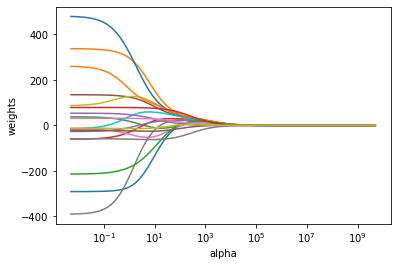

In [95]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

We now split the samples into a training set and a test set in order
to estimate the test error of ridge regression and the lasso:

In [96]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size = 0.5, random_state = 1)

In [97]:
X_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 299 to 50
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        131 non-null    float64
 1   Hits         131 non-null    float64
 2   HmRun        131 non-null    float64
 3   Runs         131 non-null    float64
 4   RBI          131 non-null    float64
 5   Walks        131 non-null    float64
 6   Years        131 non-null    float64
 7   CAtBat       131 non-null    float64
 8   CHits        131 non-null    float64
 9   CHmRun       131 non-null    float64
 10  CRuns        131 non-null    float64
 11  CRBI         131 non-null    float64
 12  CWalks       131 non-null    float64
 13  PutOuts      131 non-null    float64
 14  Assists      131 non-null    float64
 15  Errors       131 non-null    float64
 16  League_N     131 non-null    uint8  
 17  Division_W   131 non-null    uint8  
 18  NewLeague_N  131 non-null    uint8  
dtypes: floa

In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

Next we fit a ridge regression model on the training set, and evaluate
its MSE on the test set, using $\lambda = 4$:

In [101]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train)
pred2 = ridge2.predict(X_test)

In [104]:
print(mean_squared_error(y_test, pred2))

102144.52395076495


The test MSE when alpha = 4 is 102144. Now let's see what happens if we use a huge value of alpha, say $10^{10}$:

In [105]:
print(pd.Series(ridge2.coef_, index = X_raw.columns))

AtBat         -210.807322
Hits           193.076932
HmRun          -51.437368
Runs             1.624070
RBI             81.458917
Walks           94.582539
Years          -28.029476
CAtBat        -117.924364
CHits           91.159632
CHmRun          91.762010
CRuns          101.115450
CRBI           117.598963
CWalks         -38.434685
PutOuts        125.556071
Assists         25.559188
Errors         -18.518904
League_N        35.792050
Division_W     -60.245442
NewLeague_N    -18.650623
dtype: float64


In [106]:
ridgelarge = Ridge(alpha = 10**10)
ridgelarge.fit(X_train, y_train)
predlarge = ridgelarge.predict(X_test)
print(mean_squared_error(y_test, predlarge))
print(pd.Series(ridgelarge.coef_, index = X_raw.columns))

172862.22059245987
AtBat          2.526133e-06
Hits           2.826091e-06
HmRun          2.174902e-06
Runs           2.632138e-06
RBI            3.183658e-06
Walks          2.941154e-06
Years          2.478179e-06
CAtBat         3.213788e-06
CHits          3.432349e-06
CHmRun         3.435819e-06
CRuns          3.522298e-06
CRBI           3.602930e-06
CWalks         3.216811e-06
PutOuts        2.851209e-06
Assists       -4.856786e-08
Errors         1.736624e-07
League_N      -1.637144e-07
Division_W    -1.015188e-06
NewLeague_N   -1.325154e-07
dtype: float64


This big penalty shrinks the coefficients to a very large degree, essentially reducing to a model containing just the intercept. This over-shrinking makes the model more biased, resulting in a higher MSE.

Okay, so fitting a ridge regression model with alpha = 4 leads to a much lower test
MSE than fitting a model with just an intercept. We now check whether
there is any benefit to performing ridge regression with alpha = 4 instead of
just performing least squares regression. Recall that least squares is simply
ridge regression with alpha = 0.

In [107]:
ridgezero = Ridge(alpha = 0)
ridgezero.fit(X_train, y_train)
predzero = ridgezero.predict(X_test)
print(mean_squared_error(y_test, predzero))
print(pd.Series(ridgezero.coef_, index = X_raw.columns))

116690.46856660757
AtBat          -266.553048
Hits            197.706218
HmRun           -38.103182
Runs             -1.007996
RBI             103.119845
Walks            79.750209
Years            45.357697
CAtBat        -1399.811384
CHits          1426.954812
CHmRun          264.037977
CRuns            86.858781
CRBI           -211.142393
CWalks           42.533597
PutOuts         126.075563
Assists          65.816094
Errors          -38.313885
League_N         66.822855
Division_W      -56.870280
NewLeague_N     -40.962688
dtype: float64


It looks like we are indeed improving over regular least-squares!

Instead of arbitrarily choosing alpha $ = 4$, it would be better to
use cross-validation to choose the tuning parameter alpha. We can do this using
the cross-validated ridge regression function, ${\tt RidgeCV()}$. By default, the function
performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the
argument ${\tt cv}$.

In [108]:
ridgecv = RidgeCV(alphas = alphas)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

66.09705742330144

In [111]:
predcv = ridgecv.predict(X_test)
print(mean_squared_error(y_test, predcv))
print(pd.Series(ridgecv.coef_, index = X_raw.columns))

99980.09304227533
AtBat          -5.266903
Hits           42.293974
HmRun          -4.414799
Runs           18.300973
RBI            35.122753
Walks          50.045214
Years           4.266424
CAtBat         13.869952
CHits          34.924052
CHmRun         47.437613
CRuns          35.565533
CRBI           47.132307
CWalks         23.839983
PutOuts        87.503814
Assists        -2.311463
Errors         -2.639522
League_N       10.060616
Division_W    -47.990988
NewLeague_N     4.726928
dtype: float64


This represents a further improvement over the test MSE that we got using
alpha $ = 4$. Finally, we refit our ridge regression model on the full data set,
using the value of alpha chosen by cross-validation, and examine the coefficient
estimates.

In [112]:
ridgewhole = Ridge(alpha = ridgecv.alpha_)
X_S = scaler.fit_transform(X_raw)
ridgewhole.fit(X_S, y)
pd.Series(ridgewhole.coef_, index = X_raw.columns)

AtBat         -12.315751
Hits           59.087964
HmRun          -5.002506
Runs           29.619573
RBI            22.059137
Walks          45.860959
Years         -10.825321
CAtBat         22.919293
CHits          51.084062
CHmRun         42.944375
CRuns          51.804166
CRBI           54.020476
CWalks         -7.193088
PutOuts        62.138342
Assists        10.160514
Errors        -16.486264
League_N       17.541464
Division_W    -53.161910
NewLeague_N     0.736461
dtype: float64

As expected, none of the coefficients are exactly zero - ridge regression does not
perform variable selection!

# The Lasso
We saw that ridge regression with a wise choice of alpha can outperform least
squares as well as the null model on the Hitters data set. We now ask
whether the lasso can yield either a more accurate or a more interpretable
model than ridge regression. In order to fit a lasso model, we'll
use the ${\tt Lasso()}$ function; however, this time we'll need to include the argument ${\tt max_iter=10000}$.
Other than that change, we proceed just as we did in fitting a ridge model:

In [113]:
lass = Lasso(max_iter = 10000)
coefs = []
for a in alphas:
    lass.set_params(alpha=a)
    lass.fit(X,y)
    coefs.append(lass.coef_)
    
np.shape(coefs)

(100, 19)

Text(0, 0.5, 'weights')

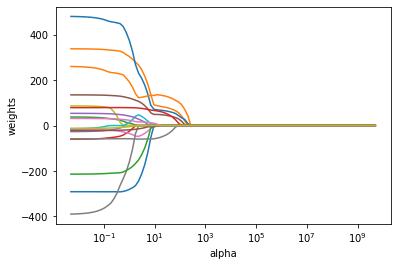

In [114]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Notice that in the coefficient plot that depending on the choice of tuning
parameter, some of the coefficients are exactly equal to zero. We now
perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [120]:
lasscv = LassoCV(alphas = alphas, cv=10, max_iter = 10000)

In [122]:
lasscv.fit(X_train, y_train)
mean_squared_error(y_test, lasscv.predict(X_test))

105033.00416337383

This is substantially lower than the test set MSE of the null model and of
least squares, and only a little worse than the test MSE of ridge regression with alpha
chosen by cross-validation.

However, the lasso has a substantial advantage over ridge regression in
that the resulting coefficient estimates are sparse. Here we see that 13 of
the 19 coefficient estimates are exactly zero:

In [124]:
pd.Series(lasscv.coef_, index = X_raw.columns)

AtBat            0.000000
Hits            49.848096
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           66.380815
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          19.017234
CRuns            0.000000
CRBI           180.885189
CWalks           0.000000
PutOuts        109.766693
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W     -43.461215
NewLeague_N      0.000000
dtype: float64